In [5]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mlx.core as mx

sys.path.append(os.getcwd())
if os.path.exists('consciousness_research'):
    sys.path.append('consciousness_research')

from conscious_chatbot import ConsciousChatbot

# Initialize
bot = ConsciousChatbot()
print("🤖 Chatbot ready.")

🤖 Chatbot ready.


## Interactive Chat Loop

Run the cell below to chat. It will display the **Global Workspace** activation for each of your inputs.

👤 You: Hello there!


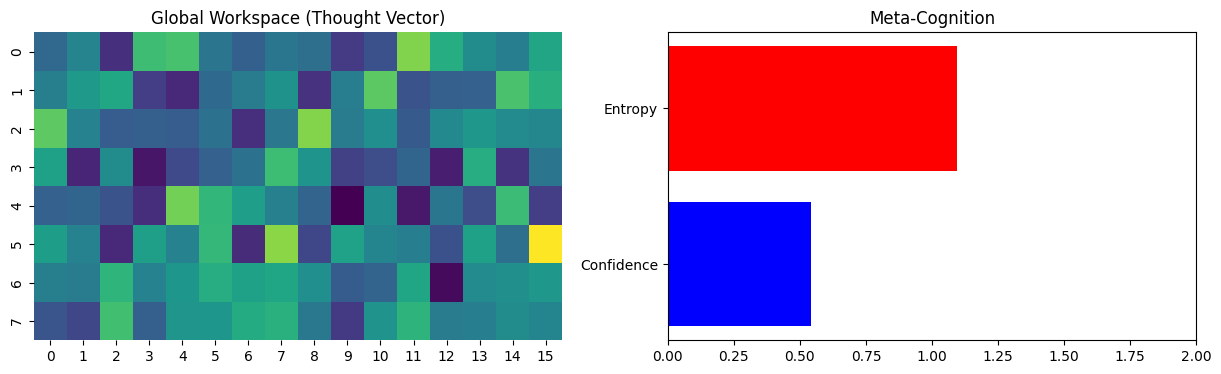

🤖 Bot: Could you clarify?
💭 (Confidence: 0.54, Entropy: 1.10, Action: 2)
--------------------------------------------------------------------------------
👤 You: What is the weather?


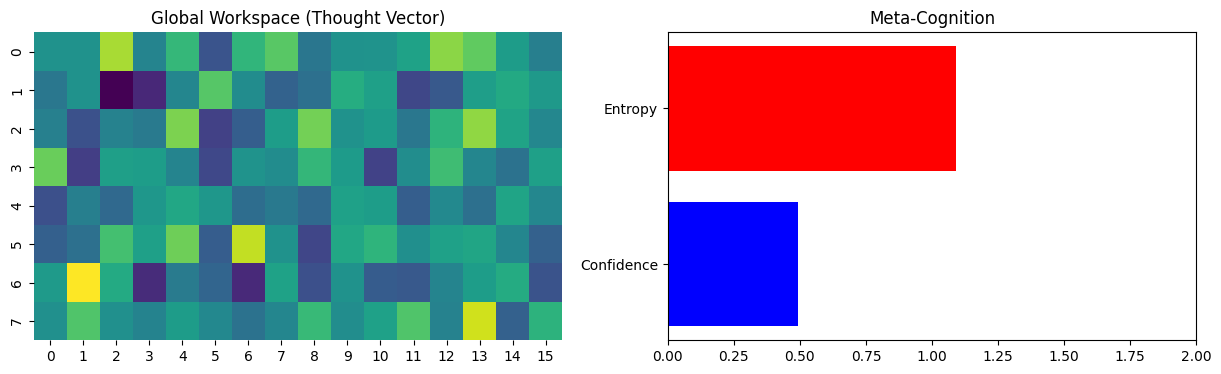

🤖 Bot: Hmm, let me think... i believe so.
💭 (Confidence: 0.49, Entropy: 1.09, Action: 1)
--------------------------------------------------------------------------------
👤 You: Why is the sky blue?


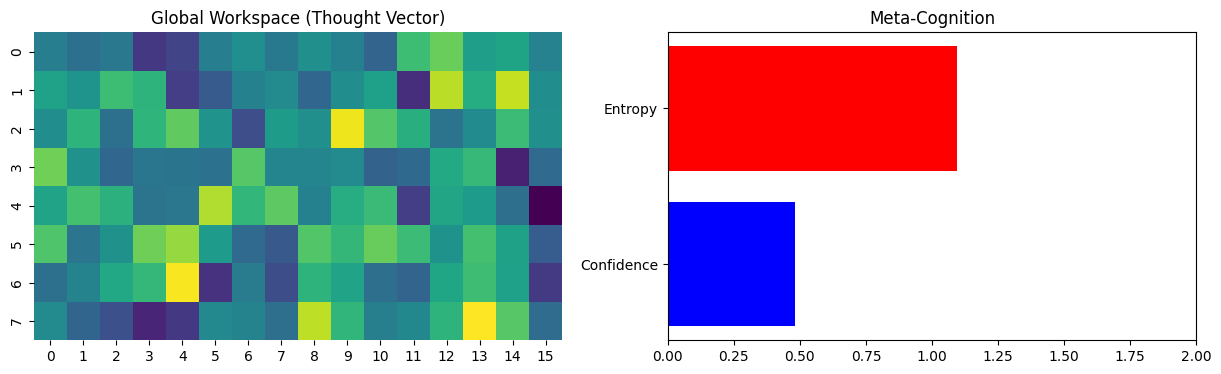

🤖 Bot: Hmm, let me think... could you clarify?
💭 (Confidence: 0.48, Entropy: 1.10, Action: 2)
--------------------------------------------------------------------------------


In [6]:
def visualize_thought(text_input):
    print(f"👤 You: {text_input}")
    
    # Process
    result = bot.chat(text_input)
    state = result['internal_state']
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
    
    # 1. Global Workspace State (128 dimensions reshaped to 8x16)
    workspace = np.array(state['state'])
    sns.heatmap(workspace.reshape(8, 16), ax=ax1, cmap="viridis", cbar=False)
    ax1.set_title("Global Workspace (Thought Vector)")
    
    # 2. System 2 Confidence
    conf = state['confidence'].item()
    ent = state['entropy'].item()
    
    # Gauge chart style
    ax2.barh(['Confidence', 'Entropy'], [conf, ent], color=['blue', 'red'])
    ax2.set_xlim(0, 2.0) # Entropy can be > 1
    ax2.set_title("Meta-Cognition")
    
    plt.show()
    
    print(f"🤖 Bot: {result['response']}")
    print(f"💭 (Confidence: {conf:.2f}, Entropy: {ent:.2f}, Action: {state['action']})")

# Interactive test
test_inputs = [
    "Hello there!",
    "What is the weather?",
    "Why is the sky blue?"
]

for msg in test_inputs:
    visualize_thought(msg)
    print("-" * 80)